<a href="https://colab.research.google.com/github/JuanfeP2004/Taller-4-Analitica-de-datos/blob/main/Taller_4CalidadDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Practica 4 de analitica de datos**
###Juan Felipe Ramírez Castañeda
###Aura Marcela Arbelaez

##**1. Calidad de datos**
##**2. Modelos de datos**

In [76]:
#Importaciones
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [77]:
datos = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep=",", na_filter=False)
datos.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [78]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


#**1 Calidad de datos**

#**1.1 Visualización de los datos**

In [79]:
datos['Gender'] = datos['Gender'].astype('category')
datos['Occupation'] = datos['Occupation'].astype('category')
datos['BMI Category'] = datos['BMI Category'].astype('category')
datos['Blood Pressure'] = datos['Blood Pressure'].astype('category')
datos['Sleep Disorder'] = datos['Sleep Disorder'].astype('category')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Person ID                374 non-null    int64   
 1   Gender                   374 non-null    category
 2   Age                      374 non-null    int64   
 3   Occupation               374 non-null    category
 4   Sleep Duration           374 non-null    float64 
 5   Quality of Sleep         374 non-null    int64   
 6   Physical Activity Level  374 non-null    int64   
 7   Stress Level             374 non-null    int64   
 8   BMI Category             374 non-null    category
 9   Blood Pressure           374 non-null    category
 10  Heart Rate               374 non-null    int64   
 11  Daily Steps              374 non-null    int64   
 12  Sleep Disorder           374 non-null    category
dtypes: category(5), float64(1), int64(7)
memory usage: 26.9 KB


In [ ]:
#Instalar pandas profiling
!pip install ydata-profiling

In [ ]:
# Cargar librería para Profiling
from ydata_profiling import ProfileReport

profile_data=ProfileReport(datos, minimal=False) # minimal=True
profile_data

In [ ]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="output.html")

# **Dimensiones de la Calidad de Datos**

**Completitud:** ¿Está toda la información disponible? ¿Hay datos faltantes o ausentes?

**Exactitud:**¿La información es correcta y libre de error?

**Conformidad:** ¿Los valores de los datos están conformes con los formatos esperados? Ejemplo: Una fecha en formato AAAA/MM/DD cuando debería ser DD/MM/AAAA.

**Oportunidad:** ¿La información llega cuando se necesita?

**Duplicidad:** ¿Existen múltiples instancias, innecesarias de los mismos objetos de datos en el conjunto de datos?

**Integridad:** ¿Faltan datos relacionados importantes? ¿Es clara la conectividad y las relaciones con otros datos?

# **Diagnóstico de las dimensiones según el perfilado:**
* Completitud: Si ya que no existen nulos.
* Exactitud: No, hay algunos datos atipicos como categorias que se repiten (sales representative/salesperson) (normal/normal weight)
* Conformidad: No, la presion esta en un formato categorico como SBP/DBP, cuando las variables deberian estar separadas y ser numericas.
* Oportunidad: No hay forma de saberlo ya que los datos no tienen una fecha especifica de recolección
* Duplicidad: No, todos los datos son unicos como nos lo muestra el ID
* Integridad: En general hay bastantes variables y con buena relación, aunque podrian agregarse variables que pudieran relacionarse como la alimentación y el estado mental de los pacientes.

#**1.2 Calidad de datos**
1. Seleccion de datos
2. Separacion de variables
3. Eliminación de atipicos
4. Inputación de nulos
5. Separación de las variables

Seleccion de datos

In [80]:
#Seleccion de datos
# Variables irrelevantes para el proceso de minería
datos = datos.drop('Person ID',axis=1) #Eliminamos el ID por ser irrelevante, axis=1 indica que es una columna
datos.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Separacion de variables

In [81]:
# Se separan los datos
datos[['Systolic Blood Presure', 'Diastolic Blood Presure']] = datos['Blood Pressure'].str.split('/', expand=True)
datos = datos.drop(columns=['Blood Pressure'])
datos.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Blood Presure,Diastolic Blood Presure
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [82]:
# Se reorganizan las columnas
sbp = datos.pop('Systolic Blood Presure')
dbp = datos.pop('Diastolic Blood Presure')
datos.insert(9, 'Systolic Blood Presure', sbp)
datos.insert(10, 'Diastolic Blood Presure', dbp)
datos.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Systolic Blood Presure,Diastolic Blood Presure,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,126,83,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,75,125,80,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,75,125,80,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,140,90,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,140,90,3000,Sleep Apnea


In [83]:
datos['Diastolic Blood Presure'] = datos['Diastolic Blood Presure'].astype('int64')
datos['Systolic Blood Presure'] = datos['Systolic Blood Presure'].astype('int64')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   374 non-null    category
 1   Age                      374 non-null    int64   
 2   Occupation               374 non-null    category
 3   Sleep Duration           374 non-null    float64 
 4   Quality of Sleep         374 non-null    int64   
 5   Physical Activity Level  374 non-null    int64   
 6   Stress Level             374 non-null    int64   
 7   BMI Category             374 non-null    category
 8   Heart Rate               374 non-null    int64   
 9   Systolic Blood Presure   374 non-null    int64   
 10  Diastolic Blood Presure  374 non-null    int64   
 11  Daily Steps              374 non-null    int64   
 12  Sleep Disorder           374 non-null    category
dtypes: category(4), float64(1), int64(8)
memory usage: 28.7 KB


Eliminacion de atipicos

In [84]:
#Se asigna valor nulo a los atípicos
datos.Occupation[datos["Occupation"]=="Sales Representative"]=np.nan #Nulo
datos['BMI Category'][datos['BMI Category']=="Normal Weight"]=np.nan #Nulo
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   374 non-null    category
 1   Age                      374 non-null    int64   
 2   Occupation               372 non-null    category
 3   Sleep Duration           374 non-null    float64 
 4   Quality of Sleep         374 non-null    int64   
 5   Physical Activity Level  374 non-null    int64   
 6   Stress Level             374 non-null    int64   
 7   BMI Category             353 non-null    category
 8   Heart Rate               374 non-null    int64   
 9   Systolic Blood Presure   374 non-null    int64   
 10  Diastolic Blood Presure  374 non-null    int64   
 11  Daily Steps              374 non-null    int64   
 12  Sleep Disorder           374 non-null    category
dtypes: category(4), float64(1), int64(8)
memory usage: 28.7 KB


<ipython-input-84-92fa35a32b7c>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  datos.Occupation[datos["Occupation"]=="Sales Representative"]=np.nan #Nulo
<ipython-input-84-92fa35a32b7c>:3: FutureWarning: ChainedAssignmentError: behaviour w

Imputacion de nulos

In [85]:
#Limpieza de datos nulos: Imputación por la media y moda, (Para variables con menos del 15-20% de nulos)
from sklearn.impute import SimpleImputer

#Imputacion de variables categóricas: moda
ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
datos[['Occupation', 'BMI Category']] = ImpCategorias.fit_transform(datos[['Occupation', 'BMI Category']])

datos['Occupation'] = datos['Occupation'].astype('category')
datos['BMI Category'] = datos['BMI Category'].astype('category')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   374 non-null    category
 1   Age                      374 non-null    int64   
 2   Occupation               374 non-null    category
 3   Sleep Duration           374 non-null    float64 
 4   Quality of Sleep         374 non-null    int64   
 5   Physical Activity Level  374 non-null    int64   
 6   Stress Level             374 non-null    int64   
 7   BMI Category             374 non-null    category
 8   Heart Rate               374 non-null    int64   
 9   Systolic Blood Presure   374 non-null    int64   
 10  Diastolic Blood Presure  374 non-null    int64   
 11  Daily Steps              374 non-null    int64   
 12  Sleep Disorder           374 non-null    category
dtypes: category(4), float64(1), int64(8)
memory usage: 28.6 KB


#**1.3 Mejora de los datos**

1. Se crean dummies

In [86]:
# Todas las variables deben ser numéricas para calcular las correlaciones
# Se crean dummies para las variables categóricas

datos_num = datos.copy()
datos_num = pd.get_dummies(datos_num, columns=["Occupation","BMI Category"], drop_first=False, dtype=int)
datos_num = pd.get_dummies(datos_num, columns=['Gender'], drop_first=True, dtype=int)
datos_num.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Systolic Blood Presure,Diastolic Blood Presure,Daily Steps,Sleep Disorder,...,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,Gender_Male
0,27,6.1,6,42,6,77,126,83,4200,None,...,0,0,0,0,1,0,0,0,1,1
1,28,6.2,6,60,8,75,125,80,10000,None,...,0,0,0,0,0,0,1,0,0,1
2,28,6.2,6,60,8,75,125,80,10000,None,...,0,0,0,0,0,0,1,0,0,1
3,28,5.9,4,30,8,85,140,90,3000,Sleep Apnea,...,0,1,0,0,0,0,0,1,0,1
4,28,5.9,4,30,8,85,140,90,3000,Sleep Apnea,...,0,1,0,0,0,0,0,1,0,1


2. Se aplica el label encoder

In [87]:
#Se codifican las categorias de la VARIABLE OBJETIVO

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
datos_num["Sleep Disorder"]=labelencoder.fit_transform(datos_num["Sleep Disorder"]) #Objetivo

datos_num.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Systolic Blood Presure,Diastolic Blood Presure,Daily Steps,Sleep Disorder,...,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,Gender_Male
0,27,6.1,6,42,6,77,126,83,4200,1,...,0,0,0,0,1,0,0,0,1,1
1,28,6.2,6,60,8,75,125,80,10000,1,...,0,0,0,0,0,0,1,0,0,1
2,28,6.2,6,60,8,75,125,80,10000,1,...,0,0,0,0,0,0,1,0,0,1
3,28,5.9,4,30,8,85,140,90,3000,2,...,0,1,0,0,0,0,0,1,0,1
4,28,5.9,4,30,8,85,140,90,3000,2,...,0,1,0,0,0,0,0,1,0,1


In [88]:
datos_num.corr()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Systolic Blood Presure,Diastolic Blood Presure,Daily Steps,Sleep Disorder,...,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,Gender_Male
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.605878,0.593839,0.057973,0.232000,...,0.016831,0.518991,0.047562,-0.104251,-0.131260,-0.018359,-0.501122,-0.080075,0.532606,-0.596358
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.180406,-0.166570,-0.039533,0.177552,...,-0.015123,-0.063084,-0.280622,-0.148137,-0.049997,-0.192539,0.376518,-0.035896,-0.368484,-0.121579
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,-0.121632,-0.110151,0.016791,0.179592,...,-0.013551,-0.013757,-0.335950,-0.201176,-0.070702,-0.097806,0.318928,-0.126574,-0.280398,-0.291366
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.265416,0.382651,0.772723,0.433214,...,-0.010382,0.436296,-0.208373,-0.090821,-0.055834,-0.225345,-0.068685,-0.033234,0.080343,0.001454
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.102818,0.091811,0.186829,-0.036058,...,-0.011250,0.064523,0.278757,0.094753,0.036081,-0.167945,-0.165451,0.029459,0.157406,0.396018
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,0.294143,0.271092,-0.030309,0.205987,...,0.060605,0.264462,0.135847,0.209811,0.134287,-0.246407,-0.336579,0.567226,0.152863,0.217105
Systolic Blood Presure,0.605878,-0.180406,-0.121632,0.265416,0.102818,0.294143,1.000000,0.972885,0.103342,0.241786,...,-0.023778,0.647684,0.057184,0.012719,-0.027593,0.119482,-0.747524,0.228056,0.679851,-0.210527
Diastolic Blood Presure,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.271092,0.972885,1.000000,0.241986,0.310051,...,-0.022296,0.730651,0.017412,0.014367,-0.023652,0.126555,-0.769154,0.149503,0.727614,-0.268378
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,0.103342,0.241986,1.000000,0.342098,...,-0.042199,0.342772,-0.154642,-0.094393,-0.065435,-0.184056,0.042418,-0.355639,0.074473,-0.014509
Sleep Disorder,0.232000,0.177552,0.179592,0.433214,-0.036058,0.205987,0.241786,0.310051,0.342098,1.000000,...,-0.000215,0.620304,-0.417031,0.080324,-0.040810,-0.310537,-0.021673,0.050805,0.005132,-0.253415


<Axes: >

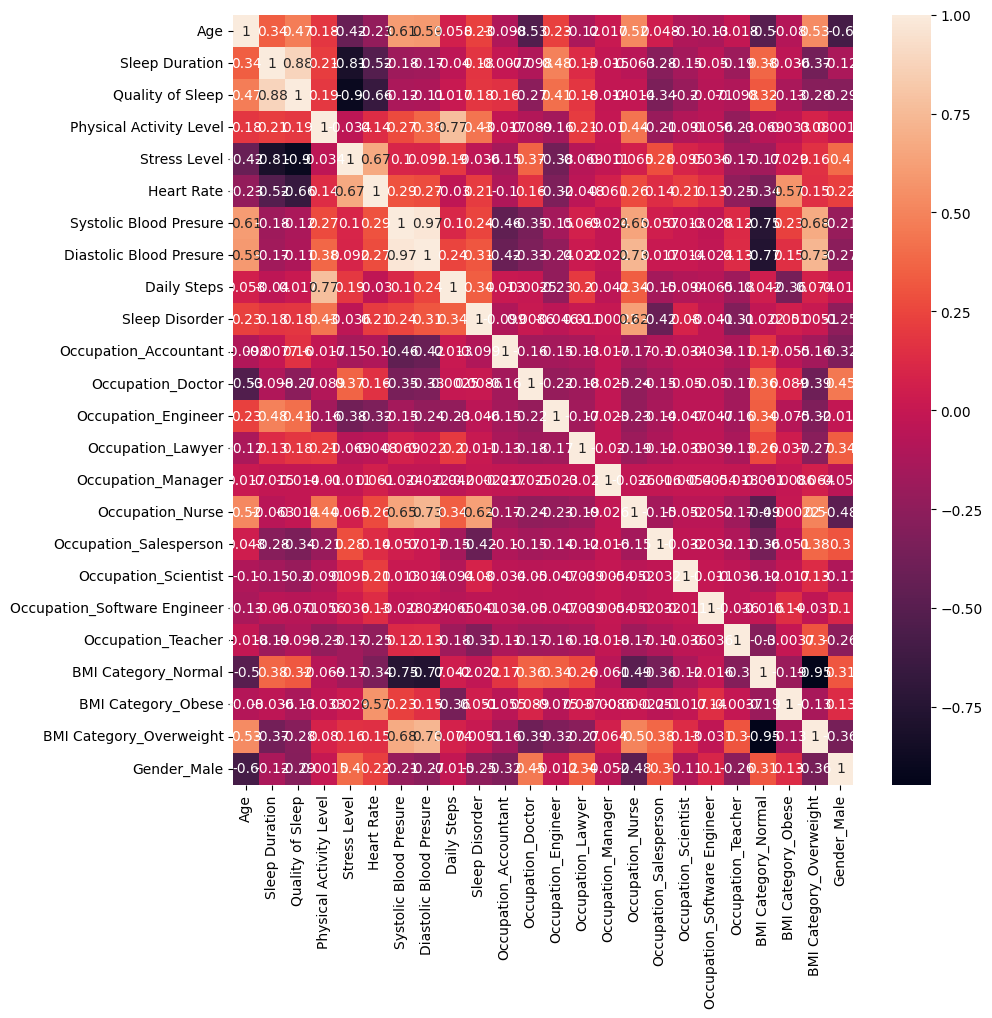

In [89]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(datos_num.corr(),annot=True)

In [90]:
#Elimino Variables redundantes

datos = datos.drop('Quality of Sleep',axis=1)
datos = datos.drop('Stress Level',axis=1)
datos = datos.drop('Systolic Blood Presure',axis=1)
datos.head()

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,BMI Category,Heart Rate,Diastolic Blood Presure,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,42,Overweight,77,83,4200,None
1,Male,28,Doctor,6.2,60,Normal,75,80,10000,None
2,Male,28,Doctor,6.2,60,Normal,75,80,10000,None
3,Male,28,Nurse,5.9,30,Obese,85,90,3000,Sleep Apnea
4,Male,28,Nurse,5.9,30,Obese,85,90,3000,Sleep Apnea


4. Aplicarles balanceo

<ipython-input-91-c2997dca070b>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(datos["Sleep Disorder"]).plot(kind="bar")


<Axes: xlabel='Sleep Disorder'>

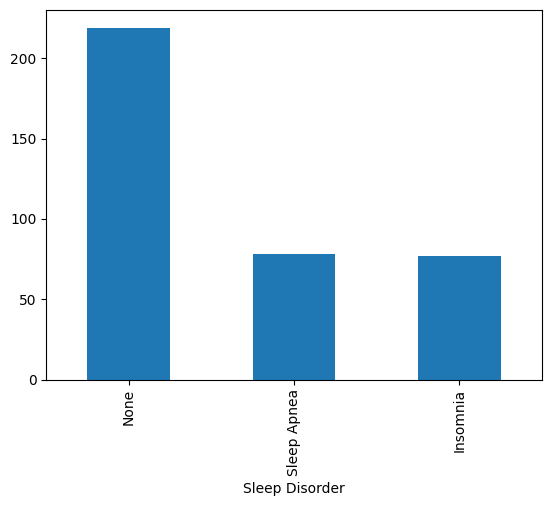

In [91]:
#Variable objetivo
pd.value_counts(datos["Sleep Disorder"]).plot(kind="bar")

In [92]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   374 non-null    category
 1   Age                      374 non-null    int64   
 2   Occupation               374 non-null    category
 3   Sleep Duration           374 non-null    float64 
 4   Physical Activity Level  374 non-null    int64   
 5   BMI Category             374 non-null    category
 6   Heart Rate               374 non-null    int64   
 7   Diastolic Blood Presure  374 non-null    int64   
 8   Daily Steps              374 non-null    int64   
 9   Sleep Disorder           374 non-null    category
dtypes: category(4), float64(1), int64(5)
memory usage: 19.9 KB


In [93]:
from imblearn.over_sampling import SMOTE, SMOTENC


sm = SMOTENC(categorical_features=[0,2,5], k_neighbors=2) #se indican las variables predictoras categoricas
X= datos.drop('Sleep Disorder', axis=1) #Predictoras
Y= datos['Sleep Disorder'] #Objetivo
X_bal, Y_bal = sm.fit_resample(X,Y) #X= variables predictoras Y=variable objetivo

<Axes: xlabel='Sleep Disorder'>

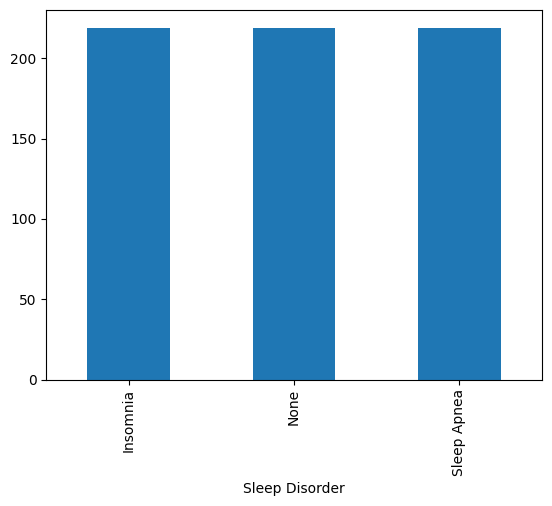

In [94]:
data  = pd.DataFrame(columns=X.columns.values, data=X_bal)
data['Sleep Disorder']=Y_bal
data['Sleep Disorder'].value_counts().plot(kind='bar')

#**Guardamos los datos**#

In [95]:
#Guardamos los datos preparados
datos.to_csv('datos_preparados.csv', index=False)